## Assignment 1: 15-Arm Bandit Simulation

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
fixed_rewards= np.linspace(5,19,15)
fixed_rewards

array([  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.])

In [4]:
prob_rewards = [np.random.normal(x) for x in fixed_rewards]

### Expected Reward:

Q<sub>n+1</sub> = Q<sub>n</sub> + 1/n(R<sub>n</sub>-Q<sub>n</sub>) <br>
Q<sub>0</sub>(a) = 5

In [5]:
Q_0 = 5

In [6]:
np.random.rand()

0.9794067843772347

In [7]:
def rewards(action,fixed=True):
    rewards = np.linspace(5,19,15)
    
    if fixed:
        return rewards[action]
    else:
        rewards = [np.random.normal(x) for x in fixed_rewards]
        return rewards[action]

In [8]:
rewards(2,False)

6.028463827099585

Q[i][action] = rewards(action)+(1/(i))*(rewards(action)-Q[i-1][action])

Iteration 1: 0
Q[i] = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] 
Q[i] max: 5, action selected: 3
Iteration 1: 2000
Q[i] = [4.868369676858414, 4.91934789793271, 6.994603791714416, 5.003943385390537, 5.041377473841437, 5.002990269673692, 5.008933662979633, 5.004572829749431, 5.011999406254785, 5.056695917367375, 5.079377880247456, 5.039685035646515, 5.046942402731832, 5.027403716115337, 5.015101853372299] 
Q[i] max: 6.994603791714416, action selected: 3
Iteration 1: 4000
Q[i] = [4.868369676858414, 4.9203003937273415, 7.00351581954221, 5.004998292804159, 5.044587097485107, 5.007327290090367, 5.008933662979633, 5.013523473386165, 5.018047394861703, 5.059485835248198, 5.087143804501393, 5.039685035646515, 5.046942402731832, 5.037015667398296, 5.019313360476242] 
Q[i] max: 7.00351581954221, action selected: 3


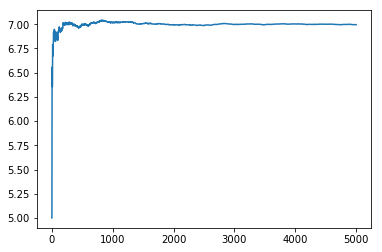

In [105]:
# Init
Q = {}
epsilon = 0.01
action_value = {}

for i in range(0,5000):
    if i == 0:
        Q[i] = [5 for i in range(0,15)]
        action = np.random.randint(1,15)
    else:
        #Q[i][action] = Q[i-1][action]+(1/(i+1))*(rewards(action,False)-Q[i-1][action]) 
        #Q[i][action] = Q[i][action]+0.01*(rewards(action)-Q[i][action]) 
        #print(Q[i][action],(1/(i)),(rewards(action),Q[i][action])) 
        
        if np.random.rand() > epsilon:
            action = np.argmax(Q[i])
        else:
            action = np.random.randint(1,15)
            
        Q[i][action] = Q[i-1][action]+(1/(i+1))*(rewards(action,False)-Q[i-1][action]) 
        
    action_value[i] = [np.array(Q[i]).max(),action]
    if i%2000==0:
        print("Iteration {}: {}\nQ[i] = {} \nQ[i] max: {}, action selected: {}".format(1%10,
                i,Q[i],np.array(Q[i]).max(),action+1))
    Q[i+1] = Q[i]

#plt.plot(list(action_value.values()))
plt.plot([action_value[x][0] for x,_ in action_value.items()])

plt.show()

In [10]:
#action_value

In [112]:
class Multi_Arm_Bandit:
    def __init__(self):
        self.K = 15 #number of arms
        self.arm_values = np.ones(self.K)*5 #initial arm value
        self.Q = np.zeros(self.K)
        
    def get_reward(self,action,fixed=True):
        rewards = np.linspace(5,19,15) #arm values
        if fixed:
            return rewards[action]
        else:
            rewards = [np.random.normal(x) for x in fixed_rewards]
            return rewards[action]
        
    def epsilon_greedy(self,epsilon):
        random_number = np.random.rand()
        if random_number > epsilon:
            return np.argmax(Q[i])
        else:
            return np.random.randint(1,15)
        
    def update_Q(self,step_value,action,reward):
        self.Q[action] += (1/(step_value+1))*(reward-self.Q[action])
        print("self.Q[action]",self.Q[action])
      

In [113]:
def experiment(bandit,Npulls,epsilon):
    history = []
    for i in range(Npulls):
        action = bandit.epsilon_greedy(epsilon)
        reward = bandit.get_reward(action)
        bandit.update_Q(i,action,reward)
        history.append(reward)
        return np.array(history)
        

self.Q[action] 7.0
self.Q[action] 7.0
self.Q[action] 15.0


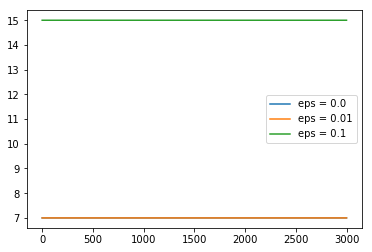

In [114]:
Nexp = 1
Npulls = 3000
avg_outcome_eps0p0 = np.zeros(Npulls) 
avg_outcome_eps0p01 = np.zeros(Npulls) 
avg_outcome_eps0p1 = np.zeros(Npulls) 

for i in range(Nexp):
    bandit = Multi_Arm_Bandit() 
    avg_outcome_eps0p0 += experiment(bandit,Npulls,0.0) 
    #print(avg_outcome_eps0p0)
    bandit = Multi_Arm_Bandit() 
    avg_outcome_eps0p01 += experiment(bandit,Npulls,0.01) 
    bandit = Multi_Arm_Bandit() 
    avg_outcome_eps0p1 += experiment(bandit,Npulls,0.1) 

avg_outcome_eps0p0 /= np.float(Nexp) 
#print(avg_outcome_eps0p0)
avg_outcome_eps0p01 /= np.float(Nexp) 
avg_outcome_eps0p1 /= np.float(Nexp) 

# plot results 
import matplotlib.pyplot as plt 
plt.plot(avg_outcome_eps0p0,label="eps = 0.0") 
plt.plot(avg_outcome_eps0p01,label="eps = 0.01") 
plt.plot(avg_outcome_eps0p1,label="eps = 0.1") 
#plt.ylim(0,2.2) 
plt.legend() 
plt.show()

In [38]:
np.ones(10)*5

array([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.])

In [14]:
np.random.normal(0,1,10) 

array([-0.78036177, -1.52816803, -0.49524248, -0.60697459, -0.94532041,
        0.49381907,  1.1725022 ,  1.1244458 , -1.68892192,  0.85073173])